# Read Data

In [1]:
import pandas as pd
cleanData = pd.read_csv('Crime Prediction Data/communities-crime-clean.csv')

#	1.Decision Trees

In [2]:
#answer a
cleanData['highCrime'] = cleanData['ViolentCrimesPerPop'] > 0.1

In [3]:
# print (cleanData.shape)
percntgPositive = (sum(cleanData['highCrime'] == True)/ (sum(cleanData['highCrime'] == True) + sum(cleanData['highCrime'] == False))) * 100
percntgNegative = 100-percntgPositive
print ('The percent of positive instances in the clean dataset is %f '%(percntgPositive))
print ('The percent of negative instances in the clean dataset is %f '%(percntgNegative))

The percent of positive instances in the clean dataset is 62.719518 
The percent of negative instances in the clean dataset is 37.280482 


In [4]:
#answer b
from sklearn import preprocessing
labelBinarizer = preprocessing.LabelBinarizer()
#remove state	communityname	fold, ViolentCrimesPerPop	highCrime
cleanTrain = cleanData.drop(cleanData.columns[[0, 1, 2, 103, 104]], axis=1)
cleanTrain.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.01           0.61          0.21          0.83          0.02   
1        0.01           0.41          0.55          0.57          0.01   
2        0.03           0.34          0.86          0.30          0.04   
3        0.01           0.38          0.35          0.71          0.04   
4        0.04           0.37          0.32          0.70          0.21   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.01         0.41         0.49         0.26        0.21   
1         0.00         0.47         0.45         0.31        0.57   
2         0.01         0.41         0.42         0.27        0.59   
3         0.01         0.39         0.46         0.31        0.49   
4         0.02         1.00         1.00         1.00        0.14   

          ...           NumStreet  PctForeignBorn  PctBornSameState  \
0         ...                0.00            0.03              0.70   
1         ...                0.00            0.00              0.93   
2         ...                0.02            0.04              0.77   
3         ...                0.00            0.03              0.78   
4         ...                0.00            0.12              0.49   

   PctSameHouse85  PctSameCity85  PctSameState85  LandArea  PopDens  \
0            0.40           0.34            0.57      0.05     0.06   
1            0.66           0.82            0.84      0.11     0.03   
2            0.59           0.70            0.64      0.06     0.11   
3            0.56           0.67            0.71      0.09     0.05   
4            0.12           0.00            0.15      0.09     0.09   

   PctUsePubTrans  LemasPctOfficDrugUn  
0            0.01                  0.0  
1            0.01                  0.0  
2            0.04                  0.0  
3            0.00                  0.0  
4            0.01                  0.0  

[5 rows x 100 columns]

In [5]:
target = labelBinarizer.fit_transform(cleanData['highCrime']).flatten()  
# df['highCrime']

In [6]:
#answer b.i
from sklearn import tree
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report
# set max_depth=6 for overfitting
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cleanTrain, target)
# print(clf.feature_importances_)
pret = clf.predict(cleanTrain)
ffff = pd.crosstab(target, pret)
# ffff
tpDT =  ffff.iloc[1][1]
tnDT =  ffff.iloc[0][0]
fpDT =  ffff.iloc[0][1]
fnDT =  ffff.iloc[1][0]
print ('The accuracy of the decision tree classifier is: ', (tpDT+tnDT)/(tpDT+tnDT+fpDT+fnDT))
print ('The precision of the decision tree classifier is: ', tpDT/(tpDT+fpDT))
print ('The recall of the decision tree classifier is: ', tpDT/(tpDT+fnDT))

The accuracy of the decision tree classifier is:  1.0
The precision of the decision tree classifier is:  1.0
The recall of the decision tree classifier is:  1.0


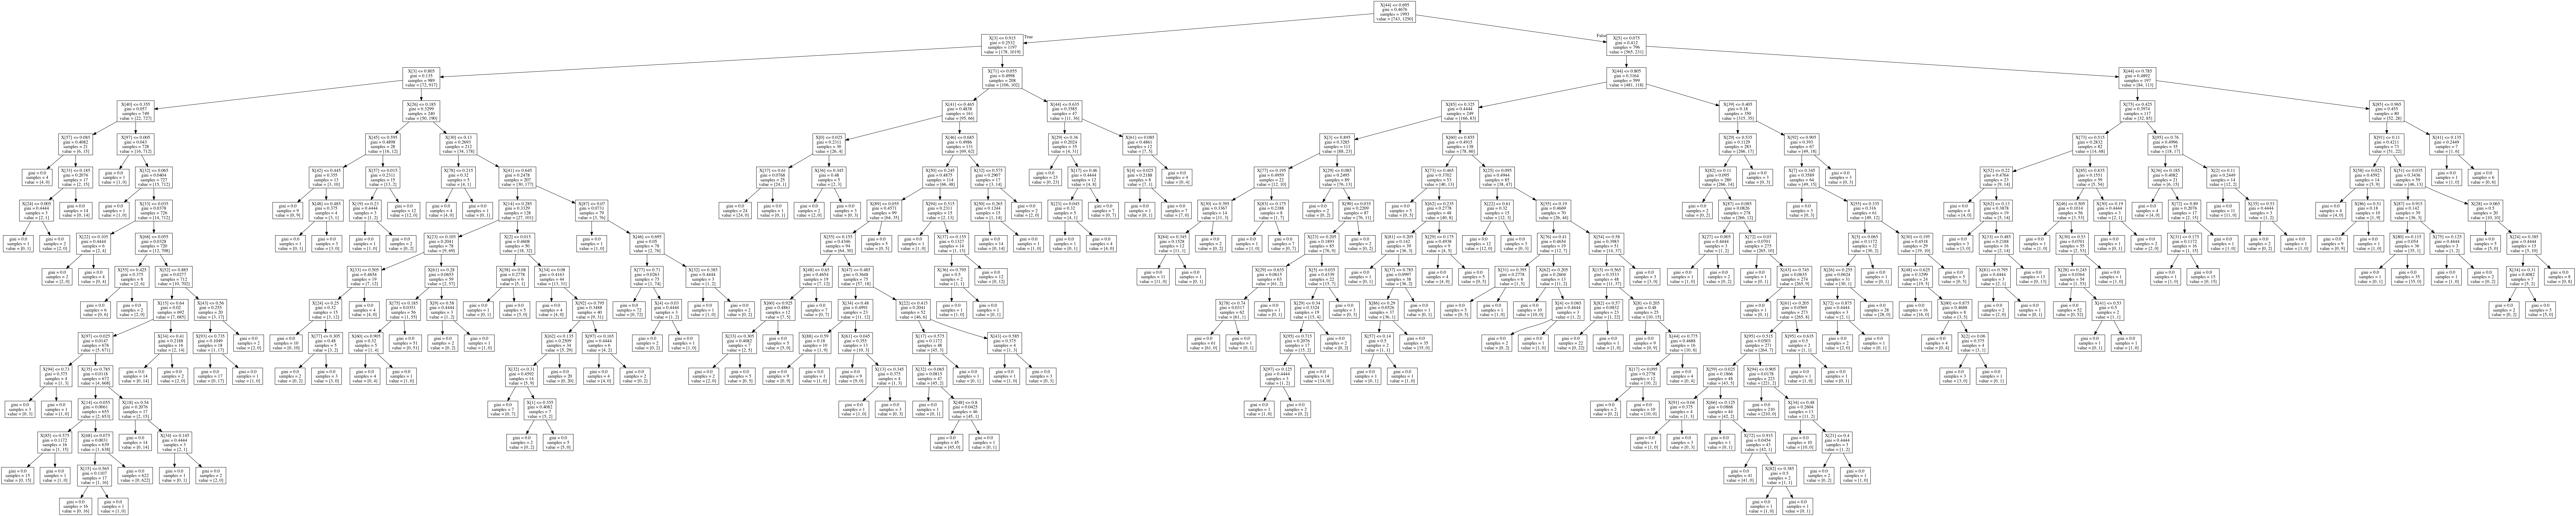

In [7]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('crime.png')
from IPython.core.display import Image
Image(filename='crime.png')

In [8]:
#answer b.ii
import numpy as np
feature = pd.DataFrame(columns=['featureName', 'Gini'])
#features is column name table
features = np.array(cleanTrain.columns)
feature['featureName'] = np.array(cleanTrain.columns)
feature['Gini'] = clf.feature_importances_
print ('The higher gini score, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. ')
print ('For example, the higher PctKids2Par(percentage of kids in family housing with two parents), the parents need stable jobs and money to support whole family. ')
print ('The Top 10 features are selected by decision tree is: ')
feature.sort_values(by='Gini', ascending=False).head(10)

The higher gini score, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
For example, the higher PctKids2Par(percentage of kids in family housing with two parents), the parents need stable jobs and money to support whole family. 
The Top 10 features are selected by decision tree is: 


featureName      Gini
44       PctKids2Par  0.363123
3       racePctWhite  0.086461
5        racePctHisp  0.050532
29   PctLess9thGrade  0.020633
34       PctEmplManu  0.020571
30      PctNotHSGrad  0.016612
85           MedRent  0.015379
55     PctImmigRec10  0.014596
60  PctSpeakEnglOnly  0.013955
33         PctEmploy  0.013364

In [9]:
# c.i
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, cleanTrain, target, cv=10, scoring='accuracy')
print ('The accuracy of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(clf, cleanTrain, target, cv=10, scoring='precision')
print ('The precision of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(clf, cleanTrain, target, cv=10, scoring='recall')
print ('The recall of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))

The accuracy of the decision tree classifier using 10-fold cross-validation is:  0.729
The precision of the decision tree classifier using 10-fold cross-validation is:  0.788827844587
The recall of the decision tree classifier using 10-fold cross-validation is:  0.7704


The purpose of cross validation is to help decision tree to qualify the model, i.e. to provide metrics such as the mean error ratio, the mse etc. which can be useful in asserting the level of precision one can expect from the application. One of the things cross validation can help assert is whether the training data is big enough.
We should instead run yet another training on 100% of the training data available, as this typically will produce a better tree. (The downside of the Cross Validation approach is that we need to divide the [typically little] amount of training data into "folds" and as you hint in the question this can lead to trees which are either overfit or underfit for particular data instances.

# 2.Linear Classification


In [11]:
# 2.a.i
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(cleanTrain, target)

In [12]:
scores = cross_val_score(gnb, cleanTrain, target, cv=10, scoring='accuracy')
print ('The accuracy of the Naive Bayes classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(gnb, cleanTrain, target, cv=10, scoring='precision')
print ('The precision of the Naive Bayes classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(gnb, cleanTrain, target, cv=10, scoring='recall')
print ('The recall of the Naive Bayes classifier using 10-fold cross-validation is: ', np.mean(scores))

The accuracy of the Naive Bayes classifier using 10-fold cross-validation is:  0.761608040201
The precision of the Naive Bayes classifier using 10-fold cross-validation is:  0.911799814828
The recall of the Naive Bayes classifier using 10-fold cross-validation is:  0.692


In [13]:
# 2.a.ii
res=[]
for i in cleanTrain.columns:
    true_data = []
    false_data = []
    for j in range(len(target)):
        if (target[j]):
            true_data.append(cleanTrain[i][j])
        else:
            false_data.append(cleanTrain[i][j])
    res.append(abs(np.mean(true_data)-np.mean(false_data))/(np.std(true_data)+np.std(false_data)))

In [14]:
print ('The Top 10 most predictive features are selected by Naive Bayes:')
gnbpf = pd.DataFrame(columns=['featureName','meansDifference'])
gnbpf['featureName'] = np.array(cleanTrain.columns)
gnbpf['meansDifference']=res
gnbpf.sort_values(by='meansDifference', ascending=False).head(10)

The Top 10 most predictive features are selected by Naive Bayes:


featureName  meansDifference
44       PctKids2Par         0.809748
43        PctFam2Par         0.745545
3       racePctWhite         0.735230
50          PctIlleg         0.709261
40      FemalePctDiv         0.693978
41       TotalPctDiv         0.674645
45  PctYoungKids2Par         0.665009
15        pctWInvInc         0.661076
46       PctTeen2Par         0.642949
38    MalePctDivorce         0.616864

PctKids2Par=percentage of kids in family housing with two parents, [0,1]
PctFam2Par=percentage of families (with kids) that are headed by two parents, [0,1]
racePctWhite=percentage of population that is caucasian, [0,1]
For example, as we know, the famlily has both parents with kids, kids or parents would like the time sharing with family, no time to raise crime. Also, father and mother both head the family, more democratic the family has, the less violence has, the crime rate should be low enough, the normalized absolute difference of means would be larger.

In [16]:
# 2.b.i
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc=lsvc.fit(cleanTrain, target)

In [17]:
scores = cross_val_score(lsvc, cleanTrain, target, cv=10, scoring='accuracy')
print ('The accuracy of linear Support Vector Machine using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(lsvc, cleanTrain, target, cv=10, scoring='precision')
print ('The precision of linear Support Vector Machine using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(lsvc, cleanTrain, target, cv=10, scoring='recall')
print ('The recall of linear Support Vector Machine using 10-fold cross-validation is: ', np.mean(scores))

The accuracy of linear Support Vector Machine using 10-fold cross-validation is:  0.796233668342
The precision of linear Support Vector Machine using 10-fold cross-validation is:  0.845404856531
The recall of linear Support Vector Machine using 10-fold cross-validation is:  0.8344


In [18]:
# 2.b.ii
print ('The Top 10 most predictive features are selected by linear Support Vector Machine:')
lsvcpf = pd.DataFrame(columns=['featureName','featureWeights'])
lsvcpf['featureName'] = np.array(cleanTrain.columns)
lsvcpf['featureWeights']=np.abs(lsvc.coef_[0])
lsvcpf.sort_values(by='featureWeights', ascending=False).head(10)

The Top 10 most predictive features are selected by linear Support Vector Machine:


featureName  featureWeights
15        pctWInvInc        1.888486
64  PersPerOccupHous        1.755126
3       racePctWhite        1.500219
44       PctKids2Par        1.190330
84         RentHighQ        1.066885
38    MalePctDivorce        1.065696
27       NumUnderPov        1.051549
90         NumStreet        1.019155
37  PctOccupMgmtProf        1.014673
0         population        1.002301

ctWInvInc=percentage of households with investment / rent income, [0,1]
PersPerOccupHous=mean persons per household, [0,1]
racePctWhite=percentage of population that is caucasian, [0,1]
Based on coefficient, we get the different results compared to decision trees, ignoring the positive coefficient or negative coefficient, and still has some common features.

# 3.	Regression

In [21]:
# 3.a.i
import warnings
# ignore some warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
target=cleanData['ViolentCrimesPerPop']
lg=lg.fit(cleanTrain,target)

In [22]:
scores = cross_val_score(lg, cleanTrain, target, cv=10, scoring='neg_mean_squared_error')
print ('The mean-squared-error (MSE) of linear model using 10-fold cross-validation is: ', np.mean(scores))

The mean-squared-error (MSE) of linear model using 10-fold cross-validation is:  -0.0200939693044


In [23]:
# 3.a.ii
print("the MSE on the whole training set is: %.7f" % np.mean((lg.predict(cleanTrain) - target) ** 2))
# lg.coef_

the MSE on the whole training set is: 0.0165168


In [24]:
# 3.a.iii
print('In general, the bigger feature weight assigned to the feature, the more predictive of the high crime rate')
lgpf = pd.DataFrame(columns=['featureName','featureWeights'])
lgpf['featureName'] = np.array(cleanTrain.columns)
lgpf['featureWeights']=lg.coef_
lgpf.sort_values(by='featureWeights', ascending=False).head(10)

In general, the bigger feature weight assigned to the feature, the more predictive of the high crime rate


featureName  featureWeights
64  PersPerOccupHous        0.635088
73     PctHousOwnOcc        0.568133
38    MalePctDivorce        0.458517
58      PctRecImmig8        0.432511
85           MedRent        0.372728
19         medFamInc        0.287979
33         PctEmploy        0.248474
39    MalePctNevMarr        0.226728
68  PctPersDenseHous        0.214353
80      OwnOccMedVal        0.212876

In [25]:
print('Similarly, the smaller feature weight assigned to the feature, the less predictive of the high crime rate')
lgpf.sort_values(by='featureWeights', ascending=False).tail(10)

Similarly, the smaller feature weight assigned to the feature, the less predictive of the high crime rate


featureName  featureWeights
57        PctRecImmig5       -0.218221
7          agePct12t29       -0.229218
82            RentLowQ       -0.234752
66  PersPerRentOccHous       -0.254572
10           numbUrban       -0.296443
79      OwnOccLowQuart       -0.308170
44         PctKids2Par       -0.322651
21         whitePerCap       -0.351016
41         TotalPctDiv       -0.561924
67     PctPersOwnOccup       -0.675694

In [26]:
# 3.b.i
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

rdgcv = RidgeCV(alphas = [10, 1, 0.1, 0.01, 0.001])
rdgcv.fit(cleanTrain, target)

mse=cross_val_score(rdgcv, cleanTrain, target, cv=10, scoring='neg_mean_squared_error')
print('The estimated MSE of the RidgeCV under 10-fold CV is:', np.mean(mse))

The estimated MSE of the RidgeCV under 10-fold CV is: -0.0197950213482


In [27]:
# 3.b.ii
print("the MSE on the whole training set is: %.7f" % np.mean((rdgcv.predict(cleanTrain) - target) ** 2))

the MSE on the whole training set is: 0.0167635


In [28]:
# 3.b.iii
print('The best alpha is:', rdgcv.alpha_) 

The best alpha is: 1.0


Increase in alpha, this model complexity reduces.
An alpha as small as enough, near to 0, gives us significant reduction in magnitude of coefficients. High alpha values can lead to significant underfitting. Note the rapid increase for values of alpha greater than 1. Though the coefficients are very very small, they are NOT zero. Alpha = 1, it is best wisely choice.

In [30]:
# 3.c.i
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=2)
poly = make_pipeline(poly, lg)
mse = cross_val_score(poly, cleanTrain, target, cv=10, scoring='neg_mean_squared_error')
print('The estimated MSE of the RidgeCV under 10-fold CV is:', np.mean(mse))

The estimated MSE of the RidgeCV under 10-fold CV is: -0.129900190577


In [31]:
# 3.c.ii
poly.fit(cleanTrain, target)
print("Mean squared error: %.7f" % np.mean((poly.predict(cleanTrain) - target) ** 2))

Mean squared error: 0.0000000


Compare estimated MSE of the RidgeCV with linear regression under 10-fold, we found the quadratic model is not better.

# 4. Dirty Data


In [32]:
fullData = pd.read_csv('Crime Prediction Data/communities-crime-full.csv')
# print("Number of rows with a ’?’ under OfficAssgnDrugUnits:",np.sum(dataFile['OfficAssgnDrugUnits']=='?'))
# print("Displaying the rows with the missing values")
# dataFile.iloc[np.where(dataFile['OfficAssgnDrugUnits']=='?')]

In [33]:
print("The ’?’ were replaced with NaN")
fullData= fullData.replace({'?': 'NaN'}, regex=False)
fullData.head()

The ’?’ were replaced with NaN


state county community        communityname  fold  population  \
0      8    NaN       NaN         Lakewoodcity     1        0.19   
1     53    NaN       NaN          Tukwilacity     1        0.00   
2     24    NaN       NaN         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45        NaN   
2         ...               0.01     0.21            0.02        NaN   
3         ...               0.02     0.39            0.28        NaN   
4         ...               0.04     0.09            0.02        NaN   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1            NaN                  NaN                  NaN   
2            NaN                  NaN                  NaN   
3            NaN                  NaN                  NaN   
4            NaN                  NaN                  NaN   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00              NaN                 0.67  
2                 0.00              NaN                 0.43  
3                 0.00              NaN                 0.12  
4                 0.00              NaN                 0.03  

[5 rows x 128 columns]

In [34]:
#answer a
fullData['highCrime'] = fullData['ViolentCrimesPerPop'] > 0.1
fullData.head()

state county community        communityname  fold  population  \
0      8    NaN       NaN         Lakewoodcity     1        0.19   
1     53    NaN       NaN          Tukwilacity     1        0.00   
2     24    NaN       NaN         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian    ...      \
0           0.33          0.02          0.90          0.12    ...       
1           0.16          0.12          0.74          0.45    ...       
2           0.42          0.49          0.56          0.17    ...       
3           0.77          1.00          0.08          0.12    ...       
4           0.55          0.02          0.95          0.09    ...       

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45        NaN            NaN                  NaN   
2     0.21            0.02        NaN            NaN                  NaN   
3     0.39            0.28        NaN            NaN                  NaN   
4     0.09            0.02        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                  NaN                 0.00              NaN   
2                  NaN                 0.00              NaN   
3                  NaN                 0.00              NaN   
4                  NaN                 0.00              NaN   

   ViolentCrimesPerPop  highCrime  
0                 0.20       True  
1                 0.67       True  
2                 0.43       True  
3                 0.12       True  
4                 0.03      False  

[5 rows x 129 columns]

In [35]:
# print (dataFile.shape)
percntgPositive = (sum(fullData['highCrime'] == True)/ (sum(fullData['highCrime'] == True) + sum(fullData['highCrime'] == False))) * 100
percntgNegative = 100-percntgPositive
print ('The percent of positive instances in the dataset is %f '%(percntgPositive))
print ('The percent of negative instances in the dataset is %f '%(percntgNegative))

The percent of positive instances in the dataset is 62.738215 
The percent of negative instances in the dataset is 37.261785 


In [38]:
from sklearn import preprocessing
labelBinarizer = preprocessing.LabelBinarizer()
#remove state	county	community	communityname, ViolentCrimesPerPop	highCrime
fullTrain = fullData.drop(fullData.columns[[0, 1, 2, 3, 127, 128]], axis=1)
for c in fullTrain.columns.values:
    imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp.fit(fullTrain[[c]].values)
    fullTrain[[c]] = imp.transform(fullTrain[[c]].values)
fullData.head()

state     county     community        communityname  fold  population  \
0    8.0  58.826829  46188.336597         Lakewoodcity     1        0.19   
1   53.0  58.826829  46188.336597          Tukwilacity     1        0.00   
2   24.0  58.826829  46188.336597         Aberdeentown     1        0.00   
3   34.0   5.000000  81440.000000  Willingborotownship     1        0.04   
4   42.0  95.000000   6096.000000    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian    ...      \
0           0.33          0.02          0.90          0.12    ...       
1           0.16          0.12          0.74          0.45    ...       
2           0.42          0.49          0.56          0.17    ...       
3           0.77          1.00          0.08          0.12    ...       
4           0.55          0.02          0.95          0.09    ...       

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45        NaN            NaN                  NaN   
2     0.21            0.02        NaN            NaN                  NaN   
3     0.39            0.28        NaN            NaN                  NaN   
4     0.09            0.02        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                  NaN                 0.00              NaN   
2                  NaN                 0.00              NaN   
3                  NaN                 0.00              NaN   
4                  NaN                 0.00              NaN   

   ViolentCrimesPerPop  highCrime  
0                 0.20       True  
1                 0.67       True  
2                 0.43       True  
3                 0.12       True  
4                 0.03      False  

[5 rows x 129 columns]

In [39]:
target = labelBinarizer.fit_transform(fullData['highCrime']).flatten()

In [40]:
#answer b.i
from sklearn import tree
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report
# set max_depth=6 for overfitting
clf = tree.DecisionTreeClassifier()
clf = clf.fit(fullTrain, target)
# print(clf.feature_importances_)
pred = clf.predict(fullTrain)
ffff = pd.crosstab(target, pred)
# ffff
tpDT =  ffff.iloc[1][1]
tnDT =  ffff.iloc[0][0]
fpDT =  ffff.iloc[0][1]
fnDT =  ffff.iloc[1][0]
print ('The accuracy of the decision tree classifier is: ', (tpDT+tnDT)/(tpDT+tnDT+fpDT+fnDT))
print ('The precision of the decision tree classifier is: ', tpDT/(tpDT+fpDT))
print ('The recall of the decision tree classifier is: ', tpDT/(tpDT+fnDT))

The accuracy of the decision tree classifier is:  1.0
The precision of the decision tree classifier is:  1.0
The recall of the decision tree classifier is:  1.0


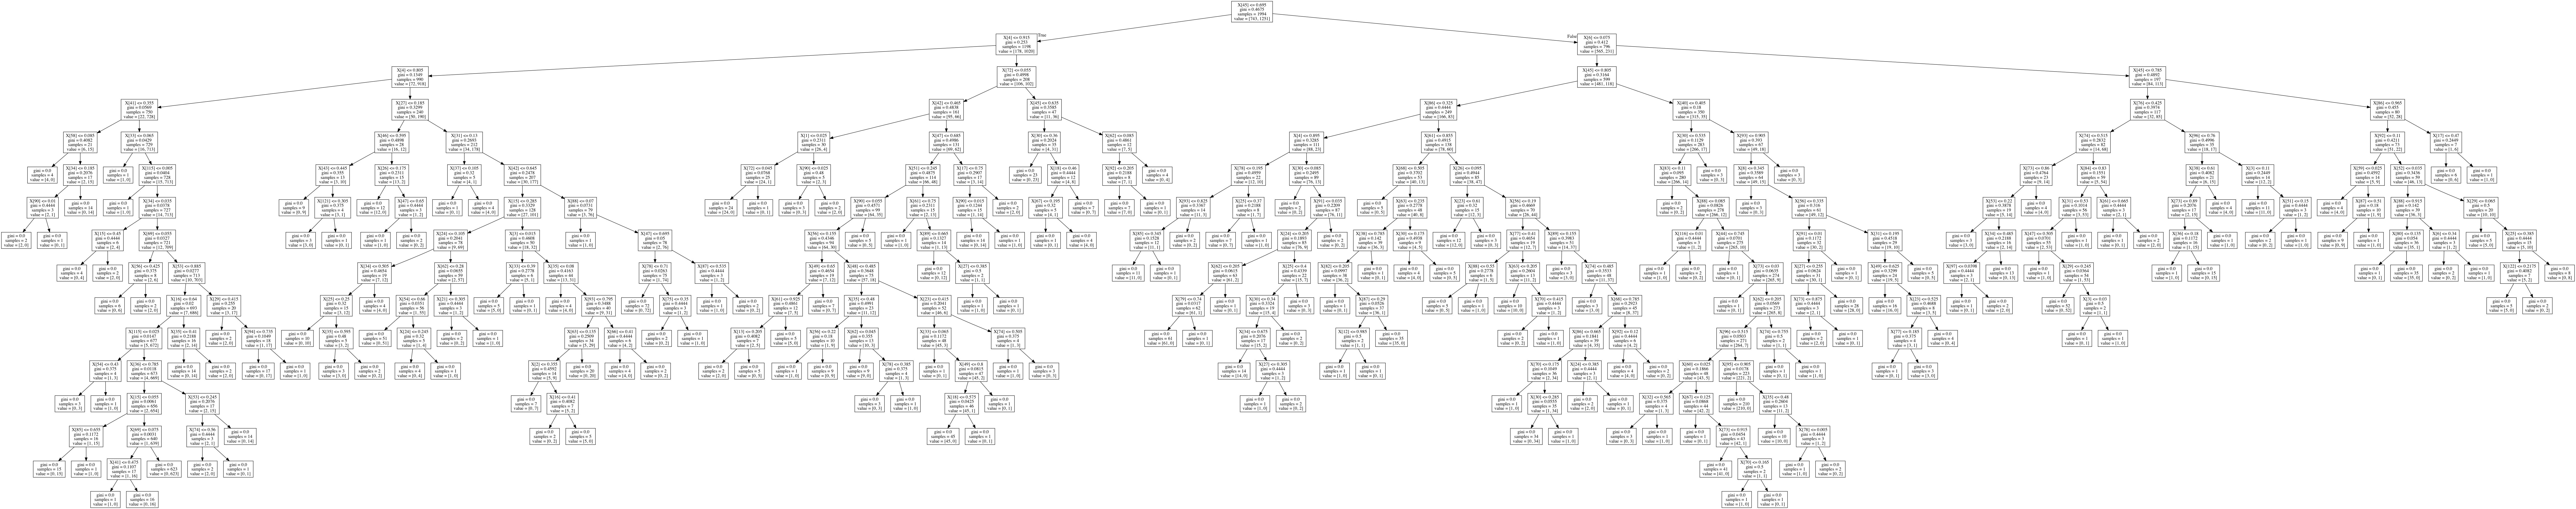

In [41]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('crime.png')
from IPython.core.display import Image
Image(filename='crime.png')

In [42]:
#answer b.ii
import numpy as np
feature = pd.DataFrame(columns=['featureName', 'Gini'])
#features is column name table
features = np.array(fullTrain.columns)
feature['featureName'] = np.array(fullTrain.columns)
feature['Gini'] = clf.feature_importances_
print ('The higher gini score, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. ')
print ('For example, the higher PctKids2Par(percentage of kids in family housing with two parents), the parents need stable jobs and money to support whole family. ')
print ('The Top 10 features are selected by decision tree is: ')
feature.sort_values(by='Gini', ascending=False).head(10)

The higher gini score, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
For example, the higher PctKids2Par(percentage of kids in family housing with two parents), the parents need stable jobs and money to support whole family. 
The Top 10 features are selected by decision tree is: 


featureName      Gini
45       PctKids2Par  0.358796
4       racePctWhite  0.086480
6        racePctHisp  0.046537
30   PctLess9thGrade  0.020667
35       PctEmplManu  0.018645
56     PctImmigRec10  0.016523
86           MedRent  0.013286
61  PctSpeakEnglOnly  0.012978
34         PctEmploy  0.012651
27        HispPerCap  0.012114

In [43]:
# c.i
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, fullTrain, target, cv=10, scoring='accuracy')
print ('The accuracy of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(clf, fullTrain, target, cv=10, scoring='precision')
print ('The precision of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(clf, fullTrain, target, cv=10, scoring='recall')
print ('The recall of the decision tree classifier using 10-fold cross-validation is: ', np.mean(scores))

The accuracy of the decision tree classifier using 10-fold cross-validation is:  0.756740131003
The precision of the decision tree classifier using 10-fold cross-validation is:  0.81866357142
The recall of the decision tree classifier using 10-fold cross-validation is:  0.792114285714


Compare to decision tree on clean data, the average accuracy, precision and recall values on full data are little bit better than previous one. Maybe because we replaced unknown data with mean value, more values near mean, mean stanard error be less, the result woulud be more accurately.

# 5. Extra Credit

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights='uniform')
#10-fold crossvalidation for KNN classifier on clean data
target = labelBinarizer.fit_transform(cleanData['highCrime']).flatten()

knn=knn.fit(cleanTrain, target)
scores = cross_val_score(knn, cleanTrain, target, cv=10, scoring='accuracy')
print ('The clean data accuracy of the KNeighbors classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(knn, cleanTrain, target, cv=10, scoring='precision')
print ('The clean data precision of the KNeighbors classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(knn, cleanTrain, target, cv=10, scoring='recall')
print ('The clean data recall of the KNeighbors using 10-fold cross-validation is: ', np.mean(scores))
# print ('The Top 10 most predictive features are selected by linear Support Vector Machine:')
# knnpf = pd.DataFrame(columns=['featureName','featureWeights'])
# knnpf['featureName'] = np.array(cleanTrain.columns)
# knnpf['featureWeights']=np.abs(knn.coef_[0])
# knnpf.sort_values(by='featureWeights', ascending=False).head(10)


The clean data accuracy of the KNeighbors classifier using 10-fold cross-validation is:  0.745557788945
The clean data precision of the KNeighbors classifier using 10-fold cross-validation is:  0.790357915244
The clean data recall of the KNeighbors using 10-fold cross-validation is:  0.8136


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(cleanTrain, target)
#10-fold crossvalidation for RandomForest classifier
scores = cross_val_score(rfc, cleanTrain, target, cv=10, scoring='accuracy')
print ('The accuracy of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(rfc, cleanTrain, target, cv=10, scoring='precision')
print ('The precision of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(rfc, cleanTrain, target, cv=10, scoring='recall')
print ('The recall of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))

The accuracy of the RandomForest classifier using 10-fold cross-validation is:  0.788680904523
The precision of the RandomForest classifier using 10-fold cross-validation is:  0.836508385657
The recall of the RandomForest classifier using 10-fold cross-validation is:  0.8248


In [66]:
#10-fold crossvalidation for KNN classifier on full data
target = labelBinarizer.fit_transform(fullData['highCrime']).flatten()

knn=knn.fit(fullTrain, target)
scores = cross_val_score(knn, fullTrain, target, cv=10, scoring='accuracy')
print ('The full data accuracy of the KNeighbors classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(knn, fullTrain, target, cv=10, scoring='precision')
print ('The full data precision of the KNeighbors classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(knn, fullTrain, target, cv=10, scoring='recall')
print ('The full data recall of the KNeighbors classifier using 10-fold cross-validation is: ', np.mean(scores))
# print ('The Top 10 most predictive features are selected by linear Support Vector Machine:')
# knnpf = pd.DataFrame(columns=['featureName','featureWeights'])
# knnpf['featureName'] = np.array(fullTrain.columns)
# knnpf['featureWeights']=np.abs(knn.coef_[0])
# knnpf.sort_values(by='featureWeights', ascending=False).head(10)

The full data accuracy of the KNeighbors classifier using 10-fold cross-validation is:  0.78883319583
The full data precision of the KNeighbors classifier using 10-fold cross-validation is:  0.841341594885
The full data recall of the KNeighbors classifier using 10-fold cross-validation is:  0.822520634921


In [68]:
#10-fold crossvalidation for RandomForest classifier on full data
target = labelBinarizer.fit_transform(fullData['highCrime']).flatten()

rfc=rfc.fit(fullTrain, target)
scores = cross_val_score(rfc, fullTrain, target, cv=10, scoring='accuracy')
print ('The full data accuracy of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(rfc, fullTrain, target, cv=10, scoring='precision')
print ('The full data precision of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))
scores = cross_val_score(rfc, fullTrain, target, cv=10, scoring='recall')
print ('The full data recall of the RandomForest classifier using 10-fold cross-validation is: ', np.mean(scores))
# print ('The Top 10 most predictive features are selected by linear Support Vector Machine:')
# knnpf = pd.DataFrame(columns=['featureName','featureWeights'])
# knnpf['featureName'] = np.array(fullTrain.columns)
# knnpf['featureWeights']=np.abs(knn.coef_[0])
# knnpf.sort_values(by='featureWeights', ascending=False).head(10)

The full data accuracy of the RandomForest classifier using 10-fold cross-validation is:  0.807903697592
The full data precision of the RandomForest classifier using 10-fold cross-validation is:  0.864637510221
The full data recall of the RandomForest classifier using 10-fold cross-validation is:  0.829733333333


From below accuray, precision and recall values, based on both clean data and full data, we know RandomForest classifier is little bit better than KNeighbors claasifier.